In [2]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import os
import matplotlib.font_manager as fm
from scipy.stats import shapiro

# One-way Anova  
귀무가설 : 4 집단의 평균은 같다 .  
대립가설 : 4 집단의 평균이 같지 않다.

p값이 0.019로 유의수준 0.05보다 작으므로 귀무가설을 기각한다.  
즉 4개의 집단의 평균은 같지 않다고 할 수있다. 

In [74]:
ds_anova = pd.read_csv('/home/pirl/포항공대 /아카데미수업내용/2주차/통계수업파일/ANOVA.csv',engine='python')
gangjong = ['a','b','c','d']

df1=ds_anova[ds_anova['gangjong']=='a']['time']
df2=ds_anova[ds_anova['gangjong']=='b']['time']
df3=ds_anova[ds_anova['gangjong']=='c']['time']
df4=ds_anova[ds_anova['gangjong']=='d']['time']

f_result = stats.f_oneway(df1,df2,df3,df4)

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)


print('검정 통계량:',f,', P-value:', p)

검정 통계량: 4.172 , P-value: 0.019


# 상관분석
귀무가설 = 상관이 없다. 0이다  
대립가설 = 상관이 있다. 0이아니다

p값이 0.0003으로 유의수준 0.05보다 작으므로 귀무가설을 기각한다.  
결과적으로 두 집단은 강한 음의 상관관계를 갖는것으로 판단 할 수 있다.

In [91]:
df = pd.DataFrame({'strength':[37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5],
                   'temperature':[14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]})
corr , pval = stats.pearsonr(df['strength'],df['temperature'])
print('상관계수 : ',corr,", p-value:",pval)

상관계수 :  -0.723107314935157 , p-value: 0.0003152005510027819


# 회귀분석
귀무가설 : 회귀식이 유의하지 않다.  
대립가설 : 회귀식이 유의하다.
p값 0.00 이 유의수준 0.05보다 낮기때문에 귀무가설을 기각한다.  

즉 f(x)= 0.0209x1 + 0.0023 이라는 회귀식이 유의하다는것을 의미한다. 그리고 이 회귀식의 설명력은 0.646로 64.6%를 설명한다.   
그리고 표본데이터의 정규성과 독립성을 확인 하였고, 단순 회귀분석 이므로 다중공선성은 만족 한다.

In [7]:
strength = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
baking_time = [0.798922,0.84902,0.816163,0.758266,0.815894,0.807477,0.809068,0.7664,0.742243,0.75118,0.740629,0.751495,0.738863,0.827428,0.818172,0.740939,0.757128,0.804695,0.695121,0.735377]

strength= sm.add_constant(strength) 
model = sm.OLS(baking_time, strength)
result = model.fit()
print(result.summary())
# len(strength)
# len(baking_time)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.91
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.94e-05
Time:                        19:39:01   Log-Likelihood:                 46.533
No. Observations:                  20   AIC:                            -89.07
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.135      0.017      0.9

# 잔차 분석
잔차의 정규성은 p값이 0.05이상이므로 정규하다는 것으로 판단 할 수 있다.  
잔차의 등분산성은 그래프를 확인한 결과 골고루 잔차가 이룬것을 볼수있었고, 특이한 이상치를 볼 수 없었다.   
잔차의 독립성의 그래프를 확인한 결과 어떠한 특정한 패턴을 가진 그래프를 그리지 않고 독립적으로 분포하는것으로 볼 수 있었다.     
그리므로 잔차의 정규성, 등분산성, 독립성을 만족한다고 할 수 있다.

(0.9452489018440247, 0.3006567656993866)

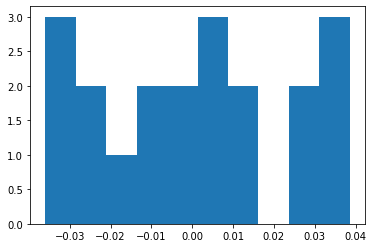

In [8]:
#정규성 검정
plt.hist(result.resid)
shapiro(result.resid)

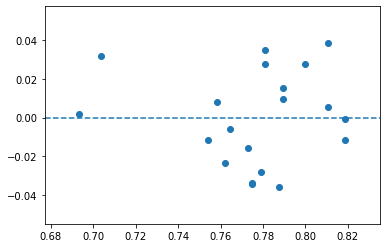

In [9]:
#둥분산성 검정
plt.scatter(result.fittedvalues, result.resid)
plt.axhline(y=0,linestyle='--')


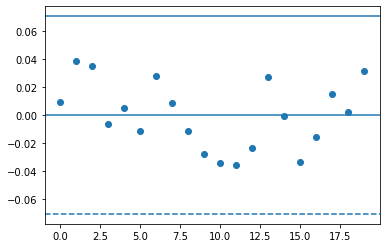

In [95]:
#독립성 검정
plt.scatter(range(0,20),result.resid ,marker="o")
plt.axhline(y=0, linestyle ='-')
plt.axhline(y=3*np.std(result.resid), linestyle ='-')
plt.axhline(y=-3*np.std(result.resid), linestyle ='--')
